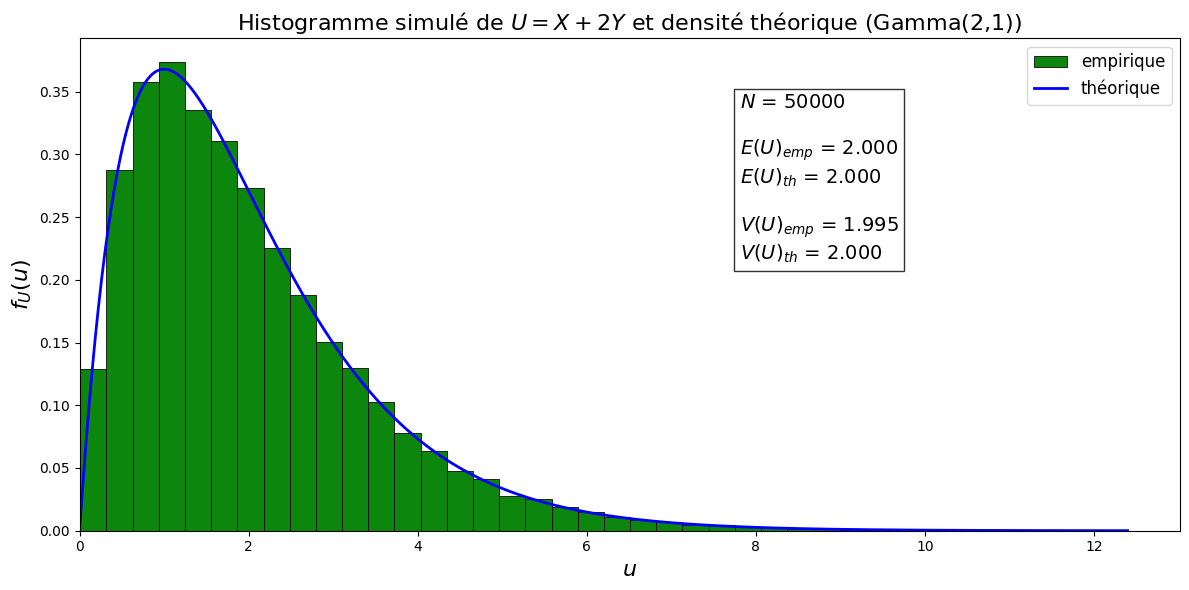

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ========== Paramètres ==========
np.random.seed(123)   # reproductibilité
N = 50000             # nombre d'expériences
bins = 40             # nombre de classes pour l'histogramme

# ========== Simulation ==========
# numpy.random.exponential prend 'scale' = 1/lambda
X = np.random.exponential(scale=1.0, size=N)   # Exp(1)
Y = np.random.exponential(scale=1/2.0, size=N) # Exp(2) -> scale = 1/2
U = X + 2.0 * Y

# ========== Statistiques empiriques ==========
E_emp = U.mean()
V_emp = U.var(ddof=0)   # variance empirique (population), ddof=0

# ========== Valeurs théoriques ==========
# Méthode 1 (directe à partir des lois):
# E[X]=1, E[Y]=1/2 -> E[U]=E[X]+2E[Y]=1 + 2*(1/2) = 2
E_th = 2.0

# Var[X]=1, Var[Y]=1/4 -> Var[U]=Var[X] + 4 Var[Y] = 1 + 4*(1/4) = 2
V_th = 2.0

# Théorie de la densité : 2Y a pour densité Exp(1) (vérification) donc
# U = somme de deux Exp(1) iid => Gamma(shape=2, scale=1) -> f(u)=u*e^{-u} pour u>=0
u_vals = np.linspace(0, U.max(), 1000)
f_theo = u_vals * np.exp(-u_vals)   # Gamma(2,1) density (Gamma(2)=1)

# ========== Tracé ==========
plt.figure(figsize=(12,6))

# histogramme empiriquement estimé (normalisé pour être une densité)
n, bins_edges, patches = plt.hist(U, bins=bins, density=True,
                                  alpha=0.95, edgecolor='black',
                                  color='green', linewidth=0.6, label='empirique')

# densité théorique en superposition
plt.plot(u_vals, f_theo, lw=2.0, color='blue', label='théorique')

# légende personnalisée (couleurs + styles)
plt.legend(loc='upper right', frameon=True, fontsize=12)

# annotations texte (N, Espérance et Variance empiriques et théoriques)
txt = (f"$N$ = {N}\n\n"
       f"$E(U)_{{emp}}$ = {E_emp:.3f}\n"
       f"$E(U)_{{th}}$ = {E_th:.3f}\n\n"
       f"$V(U)_{{emp}}$ = {V_emp:.3f}\n"
       f"$V(U)_{{th}}$ = {V_th:.3f}")
plt.gca().text(0.60, 0.55, txt, transform=plt.gca().transAxes,
               fontsize=14, bbox=dict(facecolor='white', edgecolor='black', alpha=0.8))

# axes et titre
plt.xlabel('$u$', fontsize=16)
plt.ylabel('$f_U(u)$', fontsize=16)
plt.title('Histogramme simulé de $U=X+2Y$ et densité théorique (Gamma(2,1))', fontsize=16)

# ajustements esthétiques
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(False)
plt.tight_layout()
plt.show()
